In [16]:
# importing all necessary libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

#interactivity
import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import interact_manual

In [17]:
# reading the dataset
data = pd.read_csv('data-1.csv')
data.shape

(18207, 89)

In [18]:
@interact
def view_head(left_index=188,num_rows=5):
    window=left_index+10
    right_index=min(left_index+window,len(data)-1)
    return data.iloc[:,left_index:right_index].head(num_rows)

interactive(children=(IntSlider(value=188, description='left_index', max=564, min=-188), IntSlider(value=5, de…

In [19]:
def get_int(val):
    val=str(val)
    multiplier=1
    if val[-1]=='M': multiplier=1000000
    if val[-1]=='K': multiplier=1000
    stripped=[str(i) for i in val if i!='€' and i!='K' and i!='M']
    return float(''.join(stripped))*multiplier

money_columns=['Release Clause', 'Wage', 'Value']
for i in money_columns:
    data[i]=data[i].apply(lambda x: get_int(x))

In [20]:
obj=[i for i in data.iloc[:,13:].describe(include='object')]
for i in obj:
    data[i].fillna(data[i].mode()[0],inplace=True)

In [21]:
num=[i for i in data.iloc[:,12:].describe()]
for i in num:
    data[i].fillna(data[i].median()//1, inplace=True)

In [22]:
data.fillna(0,inplace=True)

In [23]:
data.isna().sum().sum()

0

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      18207 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  float64
 12  Wage                      18207 non-null  float64
 13  Special                   18207 non-null  int64  
 14  Prefer

### Find the Most Expensive Players whose contracts are going to Expire Soon

In [25]:
@interact
def expensive_and_leaving(Top_n=5):
    def edge(val):
        if len(val)<=4: return 'Jan, 1, '+val
    df_exp=data.copy()
    #df_exp['date_sorter']=df_exp['Contract Valid Until'].apply(lambda x: edge(x))
    df_exp=df_exp.sort_values(by=['Contract Valid Until','Wage'], ascending=[True,False])[['Name','Club','Jersey Number','Position', 'Wage','Contract Valid Until','Value']]
    return df_exp.head(Top_n)



interactive(children=(IntSlider(value=5, description='Top_n', max=15, min=-5), Output()), _dom_classes=('widge…

### Make a Function to Generate a Report for Players

In [26]:
@interact
def top_n(Top_Reputations=10):


    #get player percentiles for athleticism, Offense, Goalkeeping, Defense, international rep,
    data['International Reputation Top Percentile']=round(data['International Reputation'].rank(pct=True),4)*100
    data['Athleticism']=data[['Stamina', 'Strength', 'Vision','Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'Jumping', ]].apply(lambda x: x['Stamina']+ x['Strength']+ x['Vision']+ x['Acceleration']+ x['SprintSpeed']+ x['Agility']+ 
                            x['Reactions']+ x['Balance']+ x['Jumping'],axis=1)
    data['Athleticism Top Percentile']=round(data['Athleticism'].rank(pct=True),4)*100
    data['Offense']=data[['Skill Moves','Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl','ShotPower','LongShots',]].apply(lambda x: x['Skill Moves']+
                        x['Crossing']+x['Finishing']+x['HeadingAccuracy']+x['ShortPassing']+x['Volleys']+x['Dribbling']+x['Curve']+x['FKAccuracy']+x['LongPassing']+x['BallControl']+x['ShotPower']+x['LongShots'],axis=1)
    data['Offense Top Percentile']=round(data['Offense'].rank(pct=True),4)*100
    data['Goalkeeping']=data[['GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',]].apply(lambda x: x['GKDiving']+x['GKHandling']+x['GKKicking']+x['GKPositioning']+x['GKReflexes'],axis=1)
    data['Goalkeeping Top Percentile']=round(data['Goalkeeping'].rank(pct=True),4)*100
    data['Defense']=data[['Interceptions', 'Positioning', 'StandingTackle', 'SlidingTackle','Marking' ]].apply(lambda x: x['Interceptions']+x['Positioning']+x['StandingTackle']+x['SlidingTackle']+x['Marking'],axis=1)
    data['Defense Top Percentile']=round(data['Defense'].rank(pct=True),4)*100

    return data[['Name','Club','Offense Top Percentile',
        'Defense Top Percentile','Athleticism Top Percentile',
        'Goalkeeping Top Percentile','International Reputation Top Percentile',
        'Wage']].sort_values(by='International Reputation Top Percentile',ascending=False).head(Top_Reputations)



interactive(children=(IntSlider(value=10, description='Top_Reputations', max=30, min=-10), Output()), _dom_cla…

### Compare Indian Footballers with Russian Footballers

,Nationality,Offense,Defense,Goalkeeping,Athleticism
0,India,499.066667,196.166667,83.133333,538.533333
1,Russia,631.721519,244.493671,104.848101,564.924051


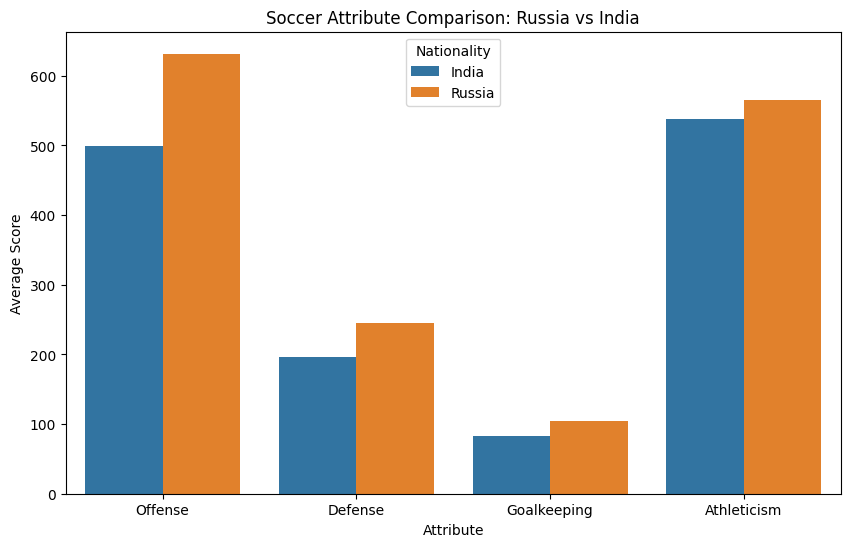

In [27]:
filtered_df=data.loc[(data['Nationality']=='Russia')|(data['Nationality']=='India')]
fi_df=filtered_df[['Name','Nationality','Club','Athleticism','Offense','Goalkeeping','Defense','International Reputation']].sort_values(by='International Reputation',ascending=False)
grouped=fi_df.groupby(['Nationality']).agg({'Offense':'mean','Defense':'mean','Goalkeeping':'mean','Athleticism':'mean'}).sort_values(by='Offense').reset_index()
display(grouped)
# Melt the DataFrame for easier plotting
grouped_melted = grouped.melt(id_vars=['Nationality'], var_name='Category', value_name='Score')

# Create a grouped barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Score', hue='Nationality', data=grouped_melted)

# Formatting
plt.title("Soccer Attribute Comparison: Russia vs India")
plt.xlabel("Attribute")
plt.ylabel("Average Score")
plt.legend(title="Nationality")

# Show the plot
plt.show()

### Find the Most Popular Footballers under 20

In [28]:
@interact  
def popular(n_most_popular=5):
    return data.loc[data['Age']<20][['Name','Age','Club','Jersey Number','Nationality','International Reputation']].sort_values(by='International Reputation',ascending=False).head(n_most_popular)


interactive(children=(IntSlider(value=5, description='n_most_popular', max=15, min=-5), Output()), _dom_classe…